# FLO Analysis ( RFM )

FLO müşterilerini segmentlere ayırıp bu segmentlere göre
pazarlama stratejileri belirlemek istiyor. Buna yönelik
olarak müşterilerin davranışları tanımlanacak ve bu
davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

**master_id :**  Eşsiz müşteri numarası  
**order_channel  :** Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)    
**last_order_channel:** En son alışverişin yapıldığı kanal   
**first_order_date:** Müşterinin yaptığı ilk alışveriş tarihi   
**last_order_date :** Müşterinin yaptığı son alışveriş tarihi    
**last_order_date_online :** Müşterinin online platformda yaptığı son alışveriş tarihi    
**last_order_date_offline:** Müşterinin offline platformda yaptığı son alışveriş tarihi     
**order_num_total_ever_online:** Müşterinin online platformda yaptığı toplam alışveriş sayısı   
**order_num_total_ever_offline :** Müşterinin offline'da yaptığı toplam alışveriş sayısı        
**customer_value_total_ever_offline :** Müşterinin offline alışverişlerinde ödediği toplam ücret    
**customer_value_total_ever_online :** Müşterinin online alışverişlerinde ödediği toplam ücret    
**interested_in_categories_12 :** Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi   

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip install squarify

In [85]:
df = pd.read_csv("flo_data_20k.csv")

In [86]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


####  Veriyi anlama (Data understanding) 

In [87]:
def check_df(dataframe,head = 5):
    print(" Shape ".center(60, '#'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(" Types ".center(60, '#'))
    print(dataframe.dtypes)
    print(" İnfo ".center(60, '#'))
    print(dataframe.info())
    print(" Describe ".center(60, '#'))
    print(dataframe.describe())
    print(" Head ".center(60, '#'))
    print(dataframe.head(head))
    print(" Tail ".center(60, '#'))
    print(dataframe.tail(head))
    print(" NA ".center(60, '#'))
    print(dataframe.isnull().sum())
    print(" Quantiles ".center(60, '#'))
    print(dataframe.quantile([0, 0.05, 0.50,0.60,0.80,0.95, 0.99, 1]).T)

In [88]:
check_df(df)

########################## Shape ###########################
Observations -------> 19945
Features     -------> 12
########################## Types ###########################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
########################### İnfo ###########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                          

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [90]:
df.nunique() # Farklı öğelerin sayısıyla Seri döndür. NaN değerlerini görmezden gelebilir.

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

In [91]:
df.interested_in_categories_12.value_counts()

[AKTIFSPOR]                                     3464
[KADIN]                                         2158
[]                                              2135
[ERKEK]                                         1973
[KADIN, AKTIFSPOR]                              1352
[ERKEK, AKTIFSPOR]                              1178
[ERKEK, KADIN]                                   848
[COCUK]                                          836
[ERKEK, KADIN, AKTIFSPOR]                        775
[AKTIFCOCUK]                                     679
[COCUK, KADIN]                                   443
[AKTIFCOCUK, COCUK]                              349
[AKTIFCOCUK, AKTIFSPOR]                          317
[COCUK, AKTIFSPOR]                               317
[COCUK, KADIN, AKTIFSPOR]                        241
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     223
[ERKEK, COCUK]                                   215
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 213
[AKTIFCOCUK, COCUK, KADIN]                    

In [92]:
df.last_order_channel.value_counts()

Android App    6783
Offline        6608
Mobile         3172
Ios App        1696
Desktop        1686
Name: last_order_channel, dtype: int64

In [93]:
df.order_channel.value_counts()

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64

In [94]:
# offline + onliene  toplam alışveriş sayısı
df['total_platform'] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [95]:
#Müşterinin platformlarda toplam  ödediği toplam ücret
df["total_platform_price"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [96]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_platform,total_platform_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [97]:
df.groupby("master_id").agg({"total_platform_price": "sum"}).head(5)

,total_platform_price
master_id,
00016786-2f5a-11ea-bb80-000d3a38a36f,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,269.47
000be838-85df-11ea-a90b-000d3a38a36f,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,1620.33


In [98]:
df.groupby("master_id").agg({"total_platform_price": "sum"}).sort_values(by = "total_platform_price", ascending=False).head(5)

,total_platform_price
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34


In [99]:
df.groupby("master_id").agg({"total_platform": "sum"}).sort_values(by = "total_platform", ascending=False).head(5)

,total_platform
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0


In [100]:
df.groupby('order_channel').agg({'total_platform':'sum',
                                    'total_platform_price':'count'}).sort_values(by='total_platform_price', ascending=False)
# count : kaç kez göründüğünü döndürün

,total_platform,total_platform_price
order_channel,,
Android App,52269.0,9495
Mobile,21679.0,4882
Ios App,15351.0,2833
Desktop,10920.0,2735


In [101]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_platform,total_platform_price
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


In [102]:
# zamanlar üzerinden işlem yapabilmek içün typlerını kontrol ederlim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [103]:
time =["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
df[time] = df[time].apply(pd.to_datetime)

In [104]:
df.info() # datetime çevirdik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

#### RFM metriklerinin hesaplanması (Calculating RFM metrics)

·**Recency:** Müşterinin ne kadar yakın zamanda satın alma işlemi gerçekleştirdiği

·**Frequency:** Müşterinin satın alma sıklığı

·**Monetary:** Müşterinin satın alma işlemlerine ne kadar para harcadığı

In [105]:
# Veri setindeki son fatura tarihine göre bir analiz tarihi belirleyelim:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [106]:
today_date = dt.datetime(2021, 6, 2)
type(today_date)

datetime.datetime

In [107]:
# rfm adında yeni bir dataframe oluşturalım ve R, F, M metriklerini atayalım:
rfm = pd.DataFrame()

In [108]:
# rfm adında yeni bir dataframe oluşturalım ve R, F, M metriklerini atayalım:

rfm = df.groupby('master_id').agg({'last_order_date': lambda last_order_date: (today_date - last_order_date.max()).days,
                                    'total_platform': lambda total_platform: total_platform.sum(),
                                    'total_platform_price': lambda total_platform_price: total_platform_price.sum()})
                                    
rfm.head()

,last_order_date,total_platform,total_platform_price
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33


In [109]:
# rfm dataframeinin kolon isimlerini güncelleyelim:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [110]:
# rfm dataframeine ait değişkenlerin istatistiki bilgilerini inceleyelim:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,19945.0,135.458360,103.281149,3.00,44.00,112.00,203.00,368.0
Frequency,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.0
Monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


####  RFM skorlarının hesaplanması (Calculating RFM scores)

In [111]:
# pd.qcut : eşit sekilde bölmeye yayar
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["Monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [112]:
rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
master_id,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07,5,4,4
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47,1,2,1
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69,2,3,4
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33,5,4,5


In [113]:
rfm["RFM_SCORE"] = (rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str))

In [114]:
rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
master_id,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07,5,4,4,54
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47,1,2,1,12
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69,2,3,4,23
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4,54
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33,5,4,5,54


#### RFM segmentlerinin oluşturulması ve analiz edilmesi (Creating & analysing RFM segments)

In [115]:
# RFM segmentlerinin oluşturulması
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [116]:
# RFM skorlarını isimlendirelim
rfm['Segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

In [117]:
rfm.head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,Segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,11,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,299,3.0,269.47,1,2,1,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,214,4.0,722.69,2,3,4,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,28,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,21,7.0,1620.33,5,4,5,54,champions


In [118]:
rfm[rfm["Segment"]=="cant_loose"].head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,Segment
master_id,,,,,,,,
007cdfe4-1f54-11ea-87bf-000d3a38a36f,356,8.0,778.88,1,5,4,15,cant_loose
00f6c98e-abb5-11e9-a2fc-000d3a38a36f,164,12.0,2199.80,2,5,5,25,cant_loose
00f7553c-5bbb-11ea-b88d-000d3a38a36f,175,12.0,1754.27,2,5,5,25,cant_loose
017bd900-a97e-11e9-a2fc-000d3a38a36f,251,8.0,699.90,1,5,4,15,cant_loose
01defd1e-a582-11e9-a2fc-000d3a38a36f,245,8.0,1497.50,1,5,5,15,cant_loose


In [119]:
rfm[rfm["Segment"] == "new_customers"].head()

,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,Segment
master_id,,,,,,,,
0022f41e-5597-11eb-9e65-000d3a38a36f,13,2.0,154.98,5,1,1,51,new_customers
00a5009a-2558-11eb-a59b-000d3a38a36f,7,2.0,245.87,5,1,1,51,new_customers
00fa3c44-748c-11eb-8577-000d3a38a36f,8,2.0,229.96,5,1,1,51,new_customers
00fb8870-d676-11e9-93bc-000d3a38a36f,28,2.0,186.48,5,1,1,51,new_customers
01024718-52fa-11ea-9ade-000d3a38a36f,25,2.0,551.14,5,1,3,51,new_customers


In [120]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
about_to_sleep       115.031649  1643   2.406573  1643   361.649373  1643
at_Risk              243.328997  3152   4.470178  3152   648.325038  3152
cant_loose           236.159129  1194  10.716918  1194  1481.652446  1194
champions             18.142187  1920   8.965104  1920  1410.708938  1920
hibernating          248.426303  3589   2.391474  3589   362.583299  3589
loyal_customers       83.557926  3375   8.356444  3375  1216.257224  3375
need_attention       114.037221   806   3.739454   806   553.436638   806
new_customers         18.976226   673   2.000000   673   344.049495   673
potential_loyalists   37.869744  2925   3.310769  2925   533.741344  2925
promising             59.694611   668   2.000000   668   334.153338   668

In [121]:
Segments = rfm['Segment'].value_counts().sort_values(ascending=False)
Segments

hibernating            3589
loyal_customers        3375
at_Risk                3152
potential_loyalists    2925
champions              1920
about_to_sleep         1643
cant_loose             1194
need_attention          806
new_customers           673
promising               668
Name: Segment, dtype: int64

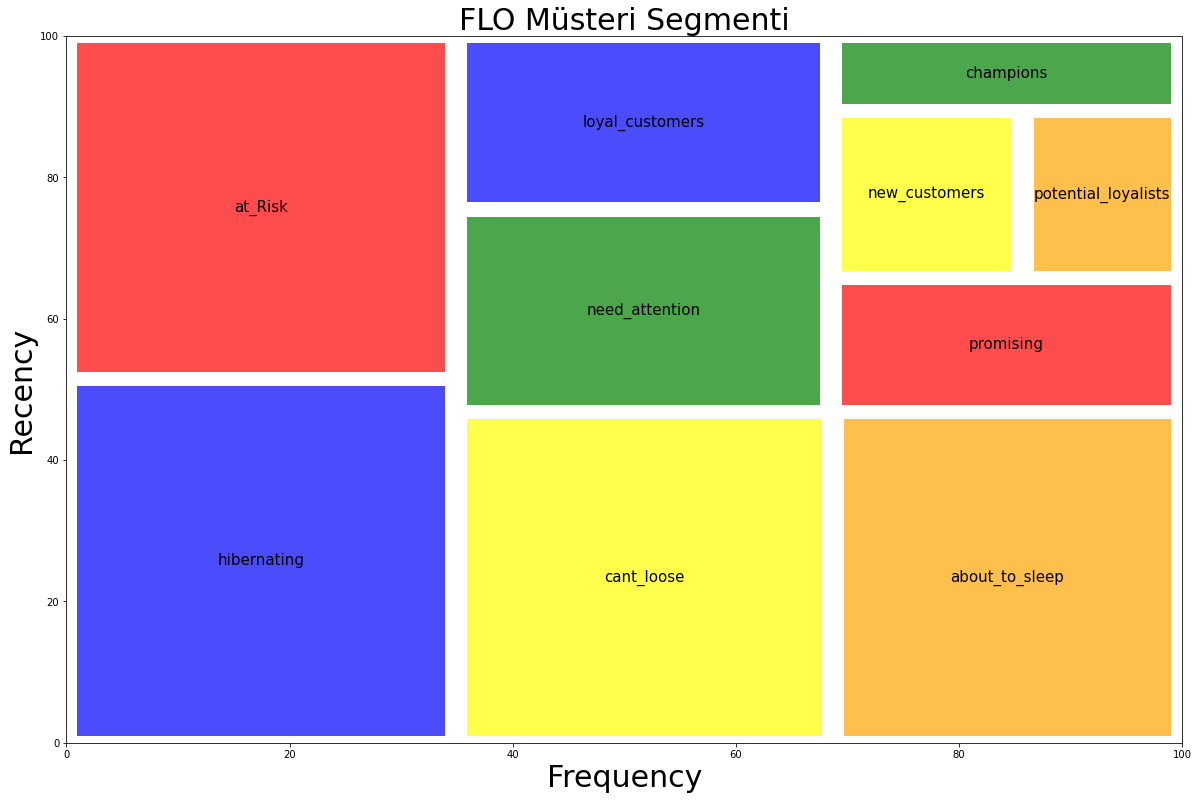

In [122]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 13)

squarify.plot(sizes=Segments,
              label=['hibernating',
                     'at_Risk',
                     'cant_loose',
                     'about_to_sleep',
                     'need_attention',
                     'loyal_customers',
                     'promising',
                     'new_customers',
                     'potential_loyalists',
                     'champions'],color=["blue","red","yellow", "orange","green"],pad=True, 
              bar_kwargs={'alpha':.70}, text_kwargs={'fontsize':15})
plt.title("FLO Müsteri Segmenti",fontsize=30)
plt.xlabel('Frequency', fontsize=30)
plt.ylabel('Recency', fontsize=30)
plt.show()